# Boilerplate

In [1]:
import pandas as pd 
import pandasql as ps
import matplotlib.pyplot as plt 
import matplotlib as mpl
plt.style.use('seaborn-white')
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms
from plotnine import *
import plotnine as pn
import math

from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def f():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
def nf():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 4)

import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', 4, 'display.max_columns', None):
        display(df)

def fg(w = 6, h = 4, dpi = 120):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
fg()

%load_ext autoreload
%autoreload 2


# Simple dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

date     value
0 1991-07-01  3.526591
1 1991-08-01  3.180891
2 1991-09-01  3.252221
3 1991-10-01  3.611003
4 1991-11-01  3.565869

# Panel data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()

market    month  year  quantity  priceMin  priceMax  priceMod state  \
6654  MUMBAI  January  2004    267100       719       971       849    MS   
6655  MUMBAI  January  2005    275845       261       513       387    MS   
6656  MUMBAI  January  2006    228000       315       488       402    MS   
6657  MUMBAI  January  2007    205200       866      1136       997    MS   
6658  MUMBAI  January  2008    267550       348       550       448    MS   

        city          date  
6654  MUMBAI  January-2004  
6655  MUMBAI  January-2005  
6656  MUMBAI  January-2006  
6657  MUMBAI  January-2007  
6658  MUMBAI  January-2008

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 parse_dates=['date'],
                 index_col='date')

In [5]:
def plot_df(df:"pandas.frame", x:str, y:str, title='',
            xlabel:str='Date', ylabel:str='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x,y, color = 'tab:red')
    plt.gca().set(title=title, xlabel=xlabel,ylabel=ylabel)
    plt.show()

## Simple yearly plot

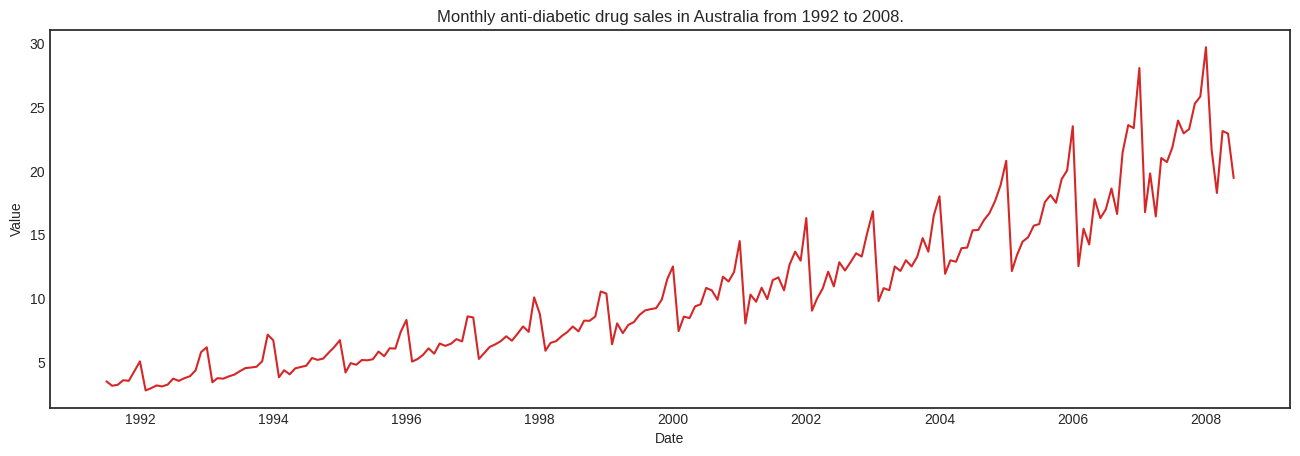

In [6]:
plot_df(df,x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia \
from 1992 to 2008.')

## Both sides plot

In [7]:
df = pd.read_csv('data/AirPassengers.csv')

In [8]:
df = df.rename(columns = {'Month':'date','#Passengers':'passengers'})

In [9]:
df

date  passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]

In [10]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m')

<AxesSubplot:xlabel='date'>

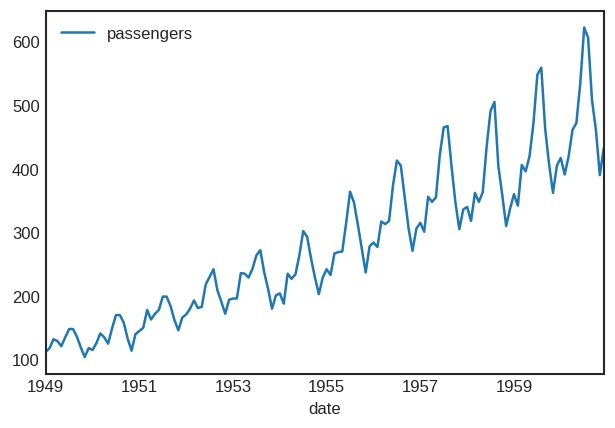

In [11]:
df.plot(kind = 'line', x = 'date', y = 'passengers')

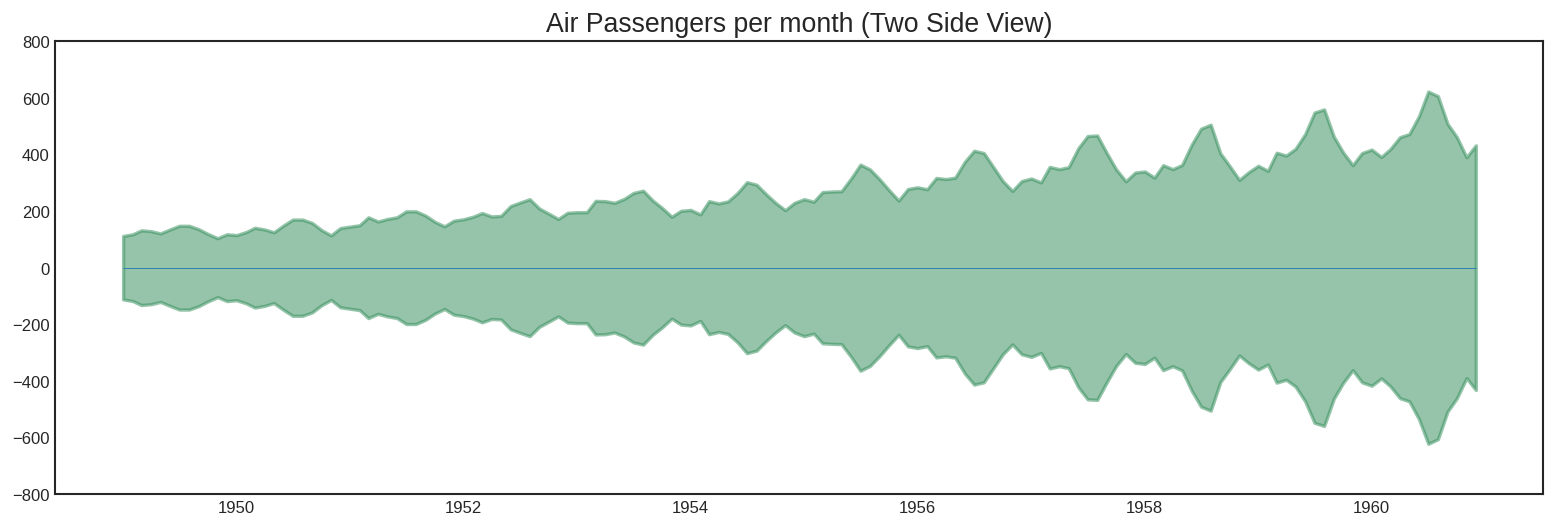

In [12]:
x = df['date']
y = df['passengers']
fig, ax = plt.subplots(1,1,figsize=(16,5), dpi=120)
plt.fill_between(x,y1=y, y2=-y, alpha=0.5, linewidth=2,color='seagreen')
plt.ylim(-800,800)
plt.title('Air Passengers per month (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.show();

## Seasonal plot

In [13]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

In [14]:
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

In [15]:
df

date      value  year month
0   1991-07-01   3.526591  1991   Jul
1   1991-08-01   3.180891  1991   Aug
2   1991-09-01   3.252221  1991   Sep
3   1991-10-01   3.611003  1991   Oct
4   1991-11-01   3.565869  1991   Nov
..         ...        ...   ...   ...
199 2008-02-01  21.654285  2008   Feb
200 2008-03-01  18.264945  2008   Mar
201 2008-04-01  23.107677  2008   Apr
202 2008-05-01  22.912510  2008   May
203 2008-06-01  19.431740  2008   Jun

[204 rows x 4 columns]

In [16]:
# Prep Colors 
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace = False)

In [17]:
mycolors

array(['xkcd:vivid purple', 'xkcd:bright lavender', 'xkcd:sapphire',
       'xkcd:dark fuchsia', 'xkcd:dusky pink', 'xkcd:dusty purple',
       'xkcd:dark tan', 'xkcd:orange brown', 'xkcd:red orange',
       'xkcd:clear blue', 'xkcd:lemon', 'xkcd:bluish grey',
       'xkcd:dark blue grey', 'xkcd:pale violet', 'xkcd:orangey yellow',
       'xkcd:cool grey', 'xkcd:green', 'xkcd:ice'], dtype='<U31')

In [18]:
df.year.value_counts()

2000    12
2007    12
1993    12
1994    12
1995    12
1996    12
1997    12
1998    12
1999    12
1992    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
1991     6
2008     6
Name: year, dtype: int64

In [19]:
y = 1991
df.loc[df.year==y,:].shape[0]-.9

5.1

In [20]:
df.dtypes

date     datetime64[ns]
value           float64
year              int64
month            object
dtype: object

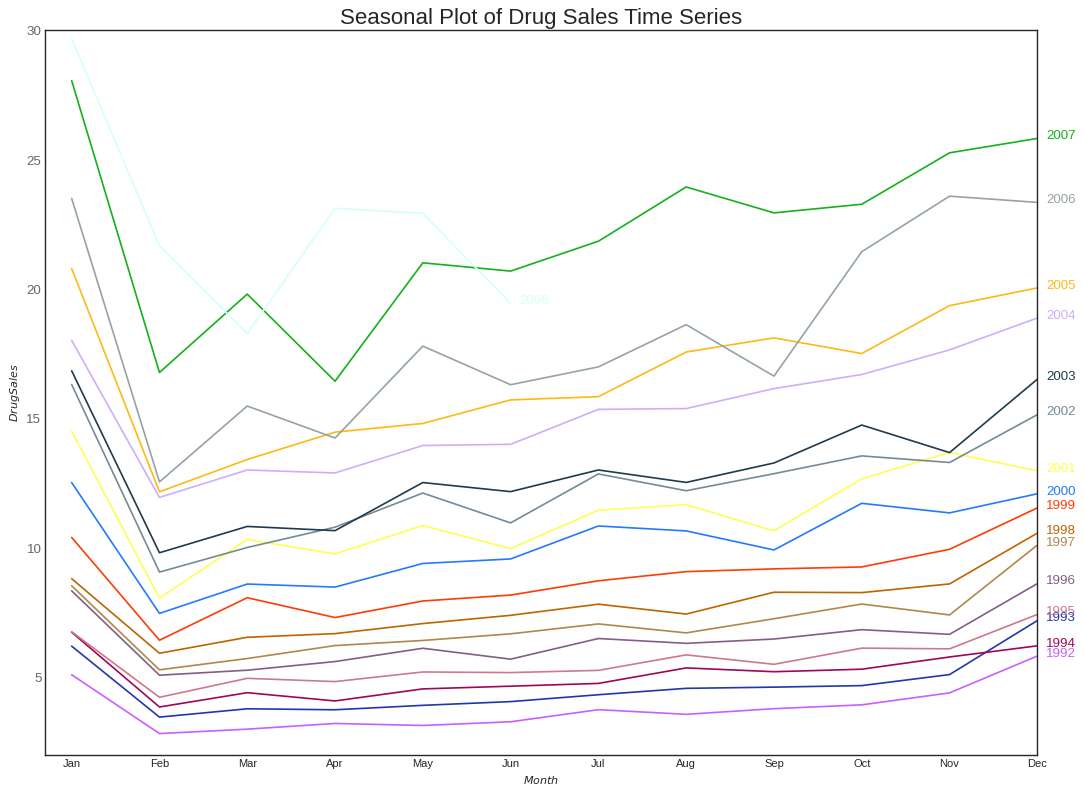

In [21]:
# Draw plot
plt.figure(figsize = (16,12), dpi = 80)
for i, y in enumerate(years):
    if i > 0:
        # Plot value over month for each year
        plt.plot('month', 'value', data = df.loc[df.year==y, :], 
                color = mycolors[i], label = y)
        plt.text(x = df.loc[df.year==y,:].shape[0]-0.9, # xposition
                 y = df.loc[df.year==y, 'value'][-1:].values[0], #yposition = last value
                 s = y, 
                 fontsize=12,
                color=mycolors[i])
# Decoration
plt.gca().set(xlim = (-0.3, 11), ylim = (2,30), 
              ylabel = '$Drug Sales$', xlabel = '$Month$')
plt.yticks(fontsize =12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize = 20)
plt.show();

- Me recuso a fazer todo esse malabarismo de novo, se posso utilizar seaborn ou o mestre dos mestres do plotnine ggplot gramática dos gráficos

In [22]:
df

date      value  year month
0   1991-07-01   3.526591  1991   Jul
1   1991-08-01   3.180891  1991   Aug
2   1991-09-01   3.252221  1991   Sep
3   1991-10-01   3.611003  1991   Oct
4   1991-11-01   3.565869  1991   Nov
..         ...        ...   ...   ...
199 2008-02-01  21.654285  2008   Feb
200 2008-03-01  18.264945  2008   Mar
201 2008-04-01  23.107677  2008   Apr
202 2008-05-01  22.912510  2008   May
203 2008-06-01  19.431740  2008   Jun

[204 rows x 4 columns]

In [23]:
df.year.dtypes

dtype('int64')

In [24]:
def tema(leg_pos:str = 'none'):
    return theme(legend_position = leg_pos
             ,legend_title = element_text(size = 16)
             ,legend_text = element_text(size = 14) 
            ,plot_title = element_text(hjust = +.5)
             ,panel_border = element_blank(), panel_grid_major = element_blank()
             ,panel_grid_minor = element_blank(), axis_line = element_line(colour = "black")
             ,axis_text_x = element_text(angle = '90')
             ,axis_text_y=element_text(colour = "black", size = 10)
             ,strip_background = element_rect(fill=None, colour = None)
             ,panel_background = element_blank()
             ,subplots_adjust = {'wspace':0.5})

In [25]:
df['year'] = df['year'].astype('category')

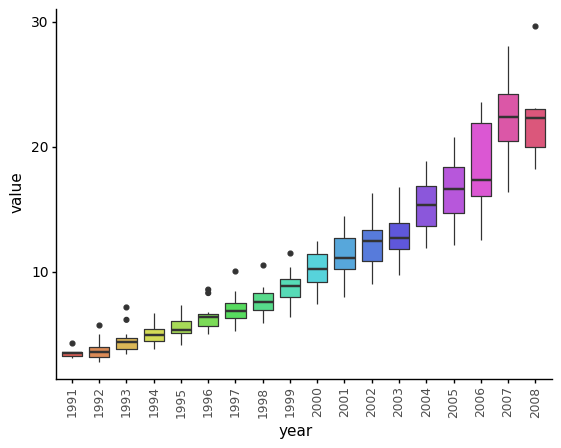

<ggplot: (8766181594529)>

In [26]:
(
    ggplot(df, aes(x = 'year', y = 'value')) + 
    geom_boxplot(aes(fill = 'year')) + 
    tema()
)

In [27]:
df['month'] = df['month'].astype('category')

_monthlist = pd.date_range('2021-01-01','2022-01-01' , freq='1M') 
_monthlist = [d.strftime('%b') for d in _monthlist]

df['month'] = df['month'].cat.reorder_categories(_monthlist)

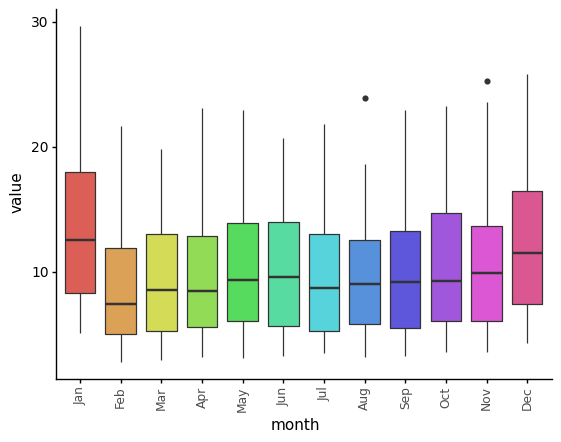

<ggplot: (8766181449437)>

In [28]:
(
    ggplot(df, aes(x = 'month', y = 'value')) + 
    geom_boxplot(aes(fill = 'month')) + 
    tema()
)

# Patterns in time series

- Base level
- Trend
- Seasonality
- Error

<AxesSubplot:title={'center':'Trend Only'}, xlabel='date'>

<AxesSubplot:title={'center':'Seasonality Only'}, xlabel='date'>

<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='date'>

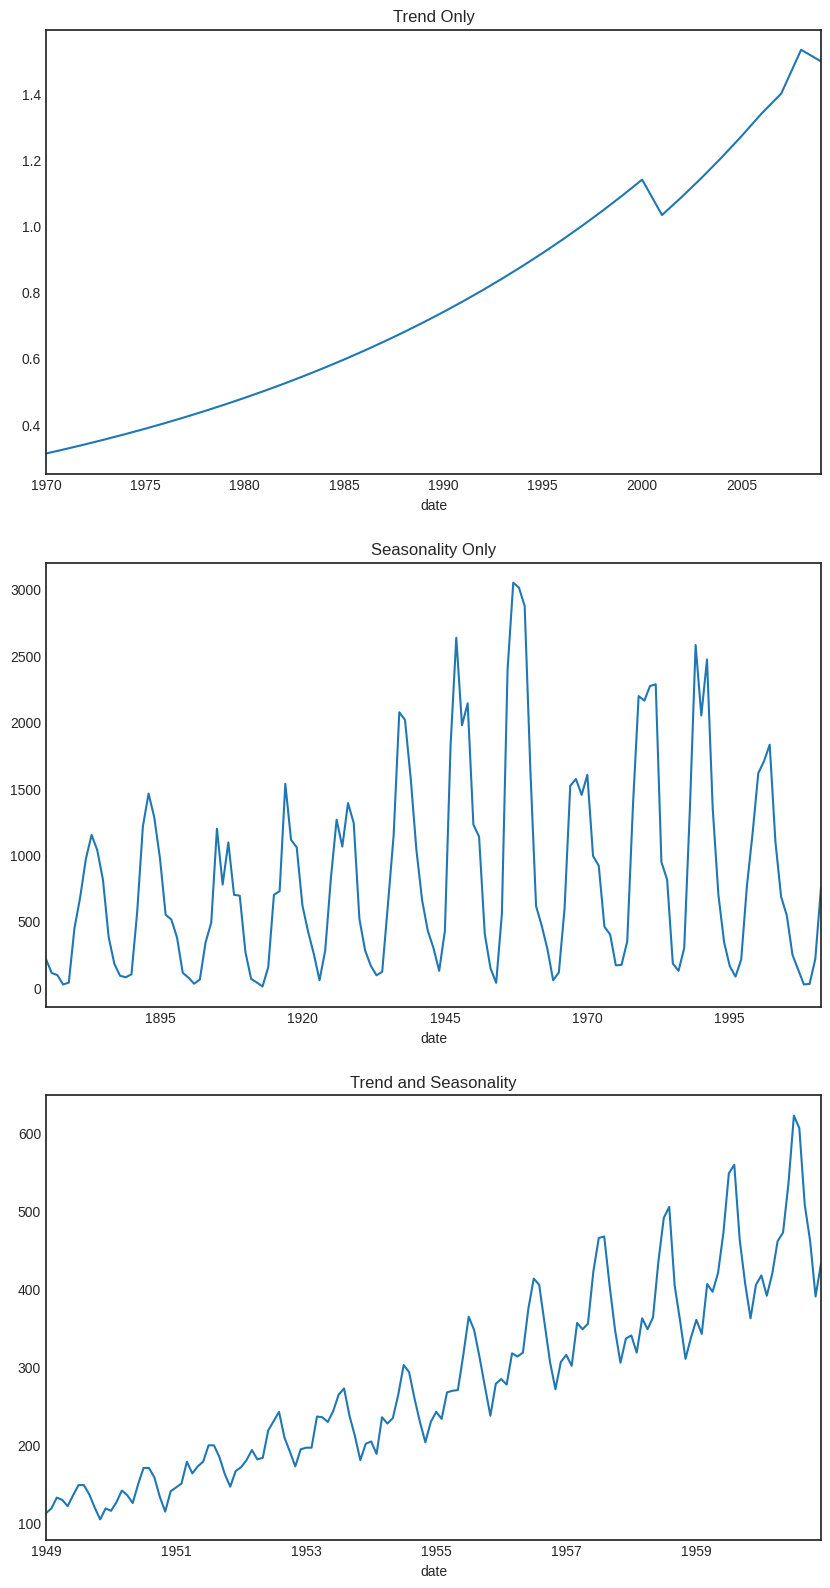

In [29]:
fig, axes = plt.subplots(3,1, figsize=(10,20), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

# Decomposition

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', 
                 parse_dates=['date'], 
                 index_col='date')

In [31]:
df

value
date                 
1991-07-01   3.526591
1991-08-01   3.180891
1991-09-01   3.252221
1991-10-01   3.611003
1991-11-01   3.565869
...               ...
2008-02-01  21.654285
2008-03-01  18.264945
2008-04-01  23.107677
2008-05-01  22.912510
2008-06-01  19.431740

[204 rows x 1 columns]

In [32]:
# Multiplicative
result_mul = seasonal_decompose(x = df['value'],
                                model = 'multiplicative', 
                                extrapolate_trend = 'freq')

# Additive
result_add = seasonal_decompose(df['value'], 
                                model = 'additive', extrapolate_trend='freq')

In [33]:
dir(result_mul)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_observed',
 '_resid',
 '_seasonal',
 '_trend',
 '_weights',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend',
 'weights']

In [34]:
# # Plot 
# fg(w = 10, h = 10)
# result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22S)
# result_add.plot().suptitle('Additive Decompose', fontsize=22)
# plt.show()

## Additive and Multiplicative Time Series

In [35]:
# Terms to be added to single season for seasonality effect
seasonal_adders = [11, 13, 12, 15, 19, 23, 21, 28, 20, 17, 15, 12]
# Immitate 10 years of data
# trend
x_range = np.arange(1, 121)

time_series = []

# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        _result = val + seasonal_adders[i]
        print(f'val {val} + seasonal_adder {seasonal_adders[i]} = {_result}')
        # Add value to seasonal scalar
        time_series.append(val + seasonal_adders[i])

val 1 + seasonal_adder 11 = 12
val 2 + seasonal_adder 13 = 15
val 3 + seasonal_adder 12 = 15
val 4 + seasonal_adder 15 = 19
val 5 + seasonal_adder 19 = 24
val 6 + seasonal_adder 23 = 29
val 7 + seasonal_adder 21 = 28
val 8 + seasonal_adder 28 = 36
val 9 + seasonal_adder 20 = 29
val 10 + seasonal_adder 17 = 27
val 11 + seasonal_adder 15 = 26
val 12 + seasonal_adder 12 = 24
val 13 + seasonal_adder 11 = 24
val 14 + seasonal_adder 13 = 27
val 15 + seasonal_adder 12 = 27
val 16 + seasonal_adder 15 = 31
val 17 + seasonal_adder 19 = 36
val 18 + seasonal_adder 23 = 41
val 19 + seasonal_adder 21 = 40
val 20 + seasonal_adder 28 = 48
val 21 + seasonal_adder 20 = 41
val 22 + seasonal_adder 17 = 39
val 23 + seasonal_adder 15 = 38
val 24 + seasonal_adder 12 = 36
val 25 + seasonal_adder 11 = 36
val 26 + seasonal_adder 13 = 39
val 27 + seasonal_adder 12 = 39
val 28 + seasonal_adder 15 = 43
val 29 + seasonal_adder 19 = 48
val 30 + seasonal_adder 23 = 53
val 31 + seasonal_adder 21 = 52
val 32 + seasonal

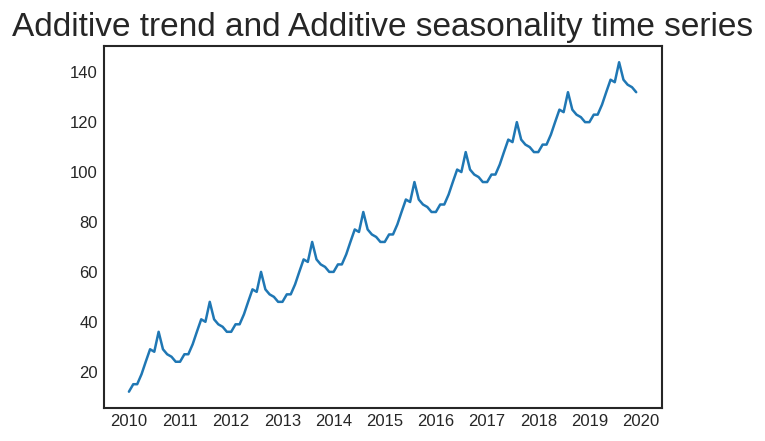

In [36]:
# Convert to DataFrame
df_aa = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Additive trend and Additive seasonality time series', size=20)
plt.plot(df_aa);

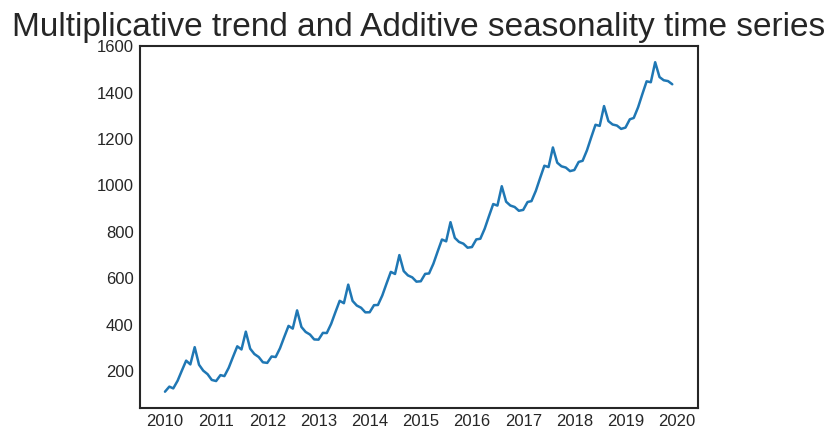

In [37]:
# Terms to be added to single season for seasonality effect
seasonal_adders = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]
# Immitate 10 years of data
x_range = np.arange(1, 121)
# Raise to the 1.5 power to get upwards "curved" trend
x_range = np.array([x**1.5 for x in x_range])

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Add value to seasonal scalar
        time_series.append(val + seasonal_adders[i])

# Convert to DataFrame
df_ma = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Multiplicative trend and Additive seasonality time series', size=20)
plt.plot(df_ma);

In [38]:
df_ma

y
2010-01-01   111.000000
2010-02-01   132.828427
2010-03-01   125.196152
2010-04-01   158.000000
2010-05-01   201.180340
...                 ...
2019-08-01  1529.358235
2019-09-01  1465.548498
2019-10-01  1451.808098
2019-11-01  1448.136742
2019-12-01  1434.534138

[120 rows x 1 columns]

## Decomposição

In [39]:
# Multiplicative
result_mulA = seasonal_decompose(x = df_ma['y'],
                                model = 'multiplicative', 
                                extrapolate_trend = 'freq')

# Additive
result_addA = seasonal_decompose(df_ma['y'], 
                                model = 'additive', extrapolate_trend='freq')

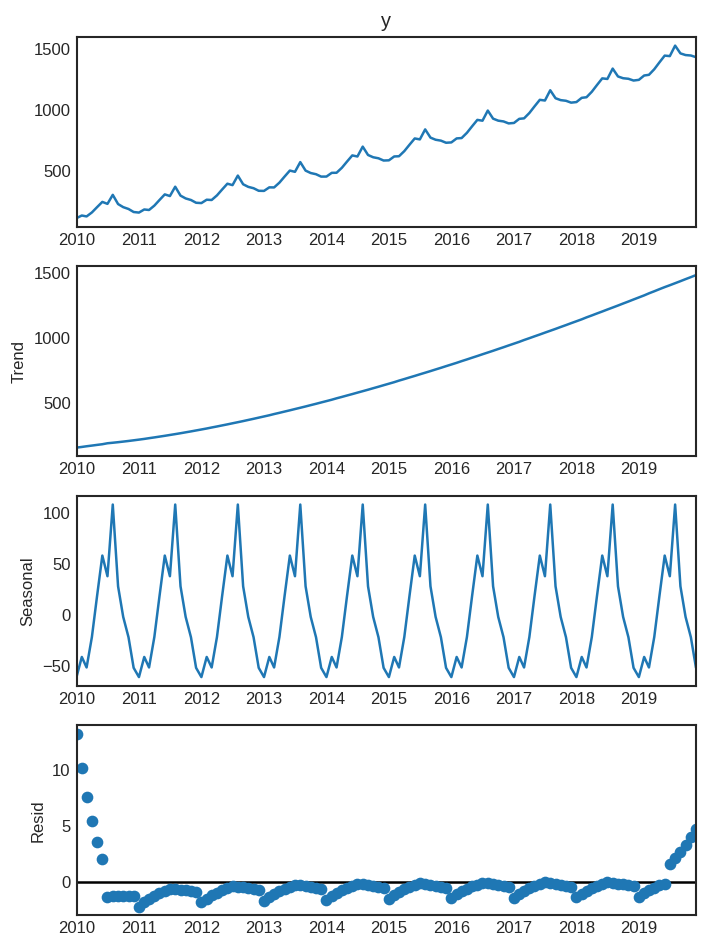

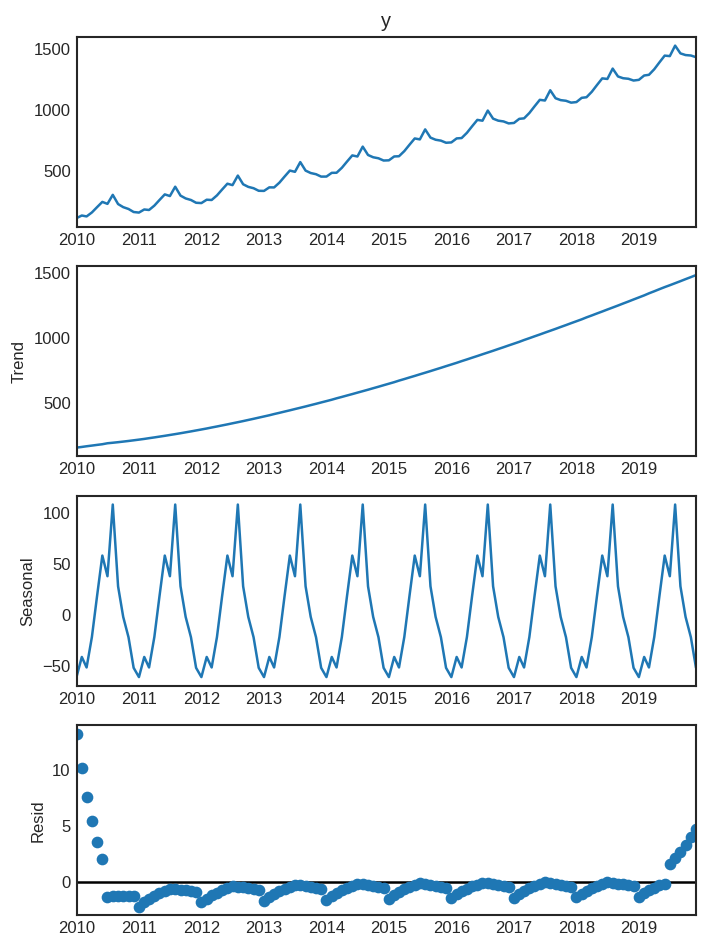

In [40]:
fg(h = 8)
result_addA.plot()

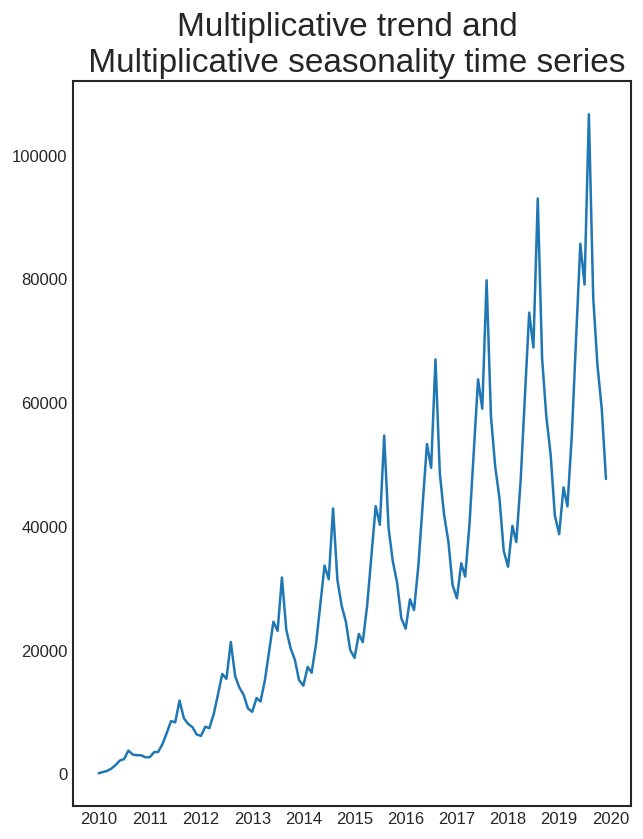

In [41]:
# Single season multiplier factors - for seasonality effect
seasonal_multipliers = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]
# Immitate 10 years of data
x_range = np.arange(1, 121)
# Raise to the 1.25 power to get upwards "curved" trend
x_range = np.array([x**1.25 for x in x_range])

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar
        time_series.append(val * seasonal_multipliers[i])
        
# Convert to DataFrame
df_mm = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Multiplicative trend and \n Multiplicative seasonality time series', size=20)
plt.plot(df_mm);

# How Decomposition Works

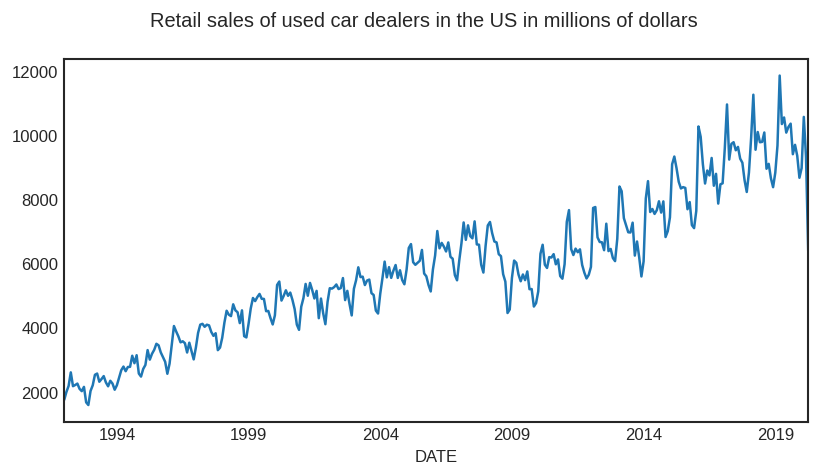

In [42]:
mydateparser = lambda x: pd.datetime.strptime(x, '%d-%m-%y');
fg(w = 8, h= 4);
df = pd.read_csv('data/retail.csv', 
                 header=0, 
                 index_col=0, 
                 parse_dates=['DATE'], 
                 date_parser=mydateparser)
fig = plt.figure();
fig.suptitle('Retail sales of used car dealers in the US in millions of dollars')
df['Retail_Sales'].plot();
plt.show();

## Guess seasonality
- We try to guess the seasonality period to extract the trend line
- From this guess, we use moving average to extract data point belonging only to the time trend series line, eliminating the seasonality and noises

In [44]:
guess = 12
halfguess = int(guess/2)
doubleguess = 12*2

## Extract trend

In [45]:
df.columns = df.columns.str.lower()
var = 'retail_sales'
#Add an empty column to store the 2x12 centered MA values
df['trend_2_12_cma'] = np.nan

#Fill it up with the 2x12 centered MA values

for i in range(6,df[var].size-halfguess):
    df['trend_2_12_cma'][i] = np.round(
        
        # Cálculo das médias móveis
        
        # Há valores para trás (6 períodos) e valores para frente (6 períodos)
        # E ponderamos atribuindo menores pesos aos extremos e maiores pesos aos intermediários
        # Primeiro valor ponderado por 1/doubleguess (24)
        df[var][i - halfguess] * 1.0 / doubleguess + 
        (
            df[var][i - 5] + 
            df[var][i - 4] + 
            df[var][i - 3] + 
            df[var][i - 2] + 
            df[var][i - 1] + 
            df[var][i] + 
            df[var][i + 1] + 
            df[var][i + 2] + 
            df[var][i + 3] + 
            df[var][i + 4] + 
            df[var][i + 5]
        # valores ponderados por 1/guess (12)
        ) * 1.0 / guess + 
        # ultimos valores ponderados por 1/doubleguess (24)
        df[var][i + halfguess] * 1.0 / doubleguess
    )

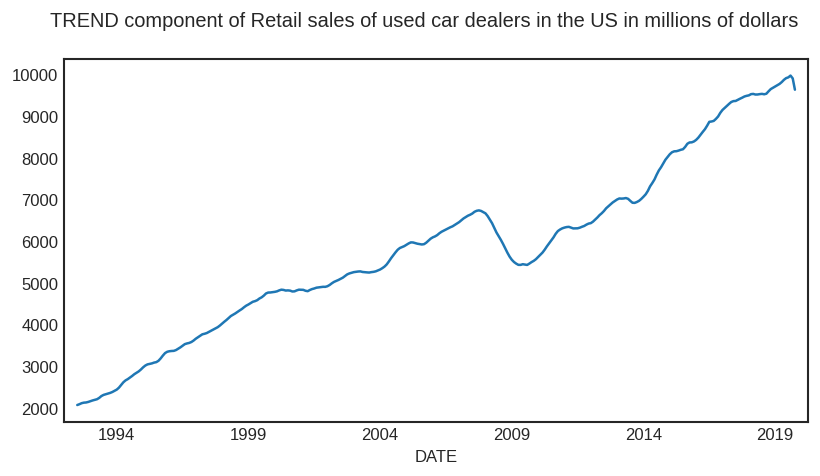

In [46]:
#plot the trend component
fig = plt.figure()
fig.suptitle('TREND component of Retail sales of used car dealers in the US in millions of dollars')
df['trend_2_12_cma'].plot();
plt.show();

## Extract seasonality and noise

In [47]:
df.head(10)

retail_sales  trend_2_12_cma
DATE                                    
1992-01-01          1744             NaN
1992-02-01          1990             NaN
1992-03-01          2177             NaN
1992-04-01          2601             NaN
1992-05-01          2171             NaN
1992-06-01          2207             NaN
1992-07-01          2251          2065.0
1992-08-01          2087          2085.0
1992-09-01          2016          2109.0
1992-10-01          2149          2122.0

In [48]:
sn = 'seasonality_and_noise' 
df[sn] = df['retail_sales']/df['trend_2_12_cma']

In [49]:
df.head(10)

retail_sales  trend_2_12_cma  seasonality_and_noise
DATE                                                           
1992-01-01          1744             NaN                    NaN
1992-02-01          1990             NaN                    NaN
1992-03-01          2177             NaN                    NaN
1992-04-01          2601             NaN                    NaN
1992-05-01          2171             NaN                    NaN
1992-06-01          2207             NaN                    NaN
1992-07-01          2251          2065.0               1.090073
1992-08-01          2087          2085.0               1.000959
1992-09-01          2016          2109.0               0.955903
1992-10-01          2149          2122.0               1.012724

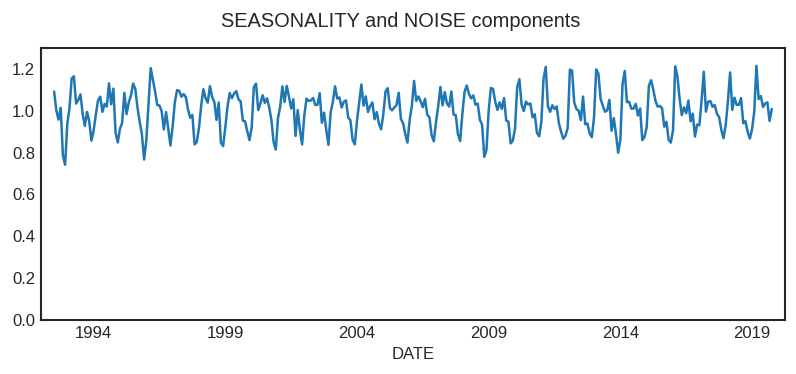

In [50]:
fg(w = 8, h = 3)
fig = plt.figure()
fig.suptitle('SEASONALITY and NOISE components')
plt.ylim(0, 1.3)
df[sn].plot();
plt.show();

## Extract pure seasonality

In [56]:
#first add a month column
df['MONTH'] = df.index.strftime('%m').astype(np.int)
#initialize the month based dictionaries to store the running total of the month wise  seasonal sums and counts
average_seasonal_values = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
average_seasonal_value_counts = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}

In [60]:
#calculate the sums and counts for each month
for i in range(0, df[sn].size):
    if math.isnan(df[sn][i]) is False:
        average_seasonal_values[df['MONTH'][i]] =  \
        average_seasonal_values[df['MONTH'][i]] + \
        df[sn][i]
        
        average_seasonal_value_counts[df['MONTH'][i]] = \
        average_seasonal_value_counts[df['MONTH'][i]] + 1

In [62]:
#calculate the average seasonal component for each month
for i in range(1, 13):
    average_seasonal_values[i] = average_seasonal_values[i] / average_seasonal_value_counts[i]
#create a new column in the data frame and fill it with the value of the average seasonal component for the corresponding month
df['SEASONALITY'] = np.nan
for i in range(0, df[sn].size):
    if math.isnan(df[sn][i]) is False:
        df['SEASONALITY'][i] = \
            average_seasonal_values[df['MONTH'][i]]

In [63]:
df.head(12)

retail_sales  trend_2_12_cma  seasonality_and_noise  MONTH  \
DATE                                                                     
1992-01-01          1744             NaN                    NaN      1   
1992-02-01          1990             NaN                    NaN      2   
1992-03-01          2177             NaN                    NaN      3   
1992-04-01          2601             NaN                    NaN      4   
1992-05-01          2171             NaN                    NaN      5   
1992-06-01          2207             NaN                    NaN      6   
1992-07-01          2251          2065.0               1.090073      7   
1992-08-01          2087          2085.0               1.000959      8   
1992-09-01          2016          2109.0               0.955903      9   
1992-10-01          2149          2122.0               1.012724     10   
1992-11-01          1667          2126.0               0.784102     11   
1992-12-01          1583          2139.0               0.740065     12   

            SEASONALITY  
DATE                     
1992-01-01          NaN  
1992-02-01          NaN  
1992-03-01          NaN  
1992-04-01          NaN  
1992-05-01          NaN  
1992-06-01          NaN  
1992-07-01     1.029609  
1992-08-01     1.045849  
1992-09-01     0.955203  
1992-10-01     0.975224  
1992-11-01     0.876665  
1992-12-01     0.845792

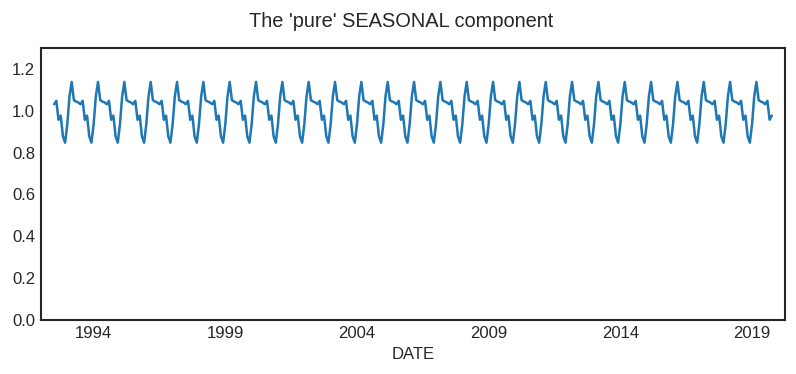

In [67]:
#plot the seasonal component
fig = plt.figure();
fig.suptitle('The \'pure\' SEASONAL component');
plt.ylim(0, 1.3);
df['SEASONALITY'].plot();
plt.show();

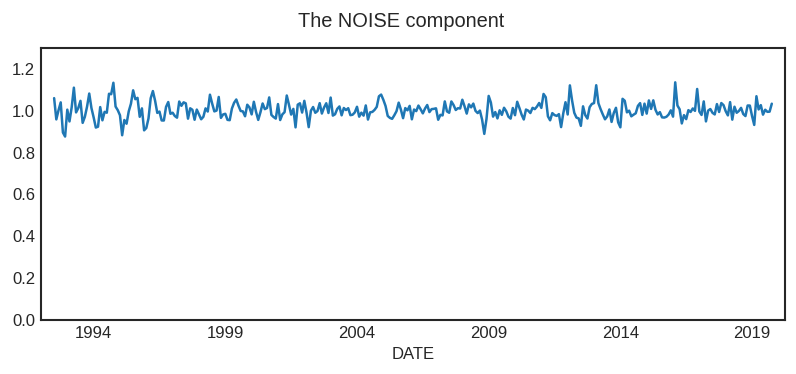

In [66]:
df['NOISE'] = df[sn]/df['SEASONALITY'];
#plot the seasonal component
fig = plt.figure();
fig.suptitle('The NOISE component');
plt.ylim(0, 1.3);
df['NOISE'].plot();
plt.show();